In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("maryanalyze/tables-on-transistor-count-wikipedia-page")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\yalts\.cache\kagglehub\datasets\maryanalyze\tables-on-transistor-count-wikipedia-page\versions\1


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


In [42]:
# Load the data from the CSV files
# Ensure the file paths are correct
try:
    cpu_df = pd.read_csv('cpu_data.csv')  # Replace with your CPU data file name
    gpu_df = pd.read_csv('gpu_data.csv')  # Replace with your GPU data file name
except FileNotFoundError:
    print("Error: One or both of the data files were not found. Please check the file paths.")
    exit()

# Handle missing values (if any)
cpu_df = cpu_df.dropna()
cpu_df['Transistor count'] = cpu_df['Transistor count'].str.replace(',', '')
cpu_df['Transistor count'] = cpu_df['Transistor count'].astype('float')
gpu_df = gpu_df.dropna()
gpu_df['Transistor count'] = gpu_df['Transistor count'].str.replace(',', '')


In [43]:

# --- CPU Data Analysis ---
print("\n--- CPU Data Analysis ---")

# Extract the relevant columns
cpu_years = cpu_df['Year'].values.reshape(-1, 1)  # Independent variable
cpu_transistors = cpu_df['Transistor count'].values  # Dependent variable

# Preprocess the data: Feature scaling
cpu_scaler = StandardScaler()
cpu_years_scaled = cpu_scaler.fit_transform(cpu_years)

# Split the data into training and testing sets
cpu_years_train, cpu_years_test, cpu_transistors_train, cpu_transistors_test = train_test_split(
    cpu_years_scaled, cpu_transistors, test_size=0.2, random_state=42
)

# --- Linear Regression ---
# Train a linear regression model
cpu_linear_model = LinearRegression()
cpu_linear_model.fit(cpu_years_train, cpu_transistors_train)
cpu_linear_predictions = cpu_linear_model.predict(cpu_years_test)

# Evaluate the model
cpu_linear_mse = mean_squared_error(cpu_transistors_test, cpu_linear_predictions)
cpu_linear_r2 = r2_score(cpu_transistors_test, cpu_linear_predictions)
print(f"CPU Linear Regression MSE: {cpu_linear_mse:.2f}")
print(f"CPU Linear Regression R^2: {cpu_linear_r2:.2f}")

# --- Polynomial Regression (Degree 2) ---
# Create polynomial features
cpu_polynomial_features = PolynomialFeatures(degree=2)
cpu_years_train_poly = cpu_polynomial_features.fit_transform(cpu_years_train)
cpu_years_test_poly = cpu_polynomial_features.transform(cpu_years_test)

# Train a polynomial regression model
cpu_poly_model = LinearRegression()
cpu_poly_model.fit(cpu_years_train_poly, cpu_transistors_train)
cpu_poly_predictions = cpu_poly_model.predict(cpu_years_test_poly)

# Evaluate the model
cpu_poly_mse = mean_squared_error(cpu_transistors_test, cpu_poly_predictions)
cpu_poly_r2 = r2_score(cpu_transistors_test, cpu_poly_predictions)
print(f"CPU Polynomial Regression (Degree 2) MSE: {cpu_poly_mse:.2f}")
print(f"CPU Polynomial Regression (Degree 2) R^2: {cpu_poly_r2:.2f}")

# --- Huber Regression ---
# Train a Huber Regressor model (robust regression)
cpu_huber_model = HuberRegressor(epsilon=1.35)  # Tune epsilon
cpu_huber_model.fit(cpu_years_train, cpu_transistors_train)
cpu_huber_predictions = cpu_huber_model.predict(cpu_years_test)

# Evaluate the model
cpu_huber_mse = mean_squared_error(cpu_transistors_test, cpu_huber_predictions)
cpu_huber_r2 = r2_score(cpu_transistors_test, cpu_huber_predictions)
print(f"CPU Huber Regression MSE: {cpu_huber_mse:.2f}")
print(f"CPU Huber Regression R^2: {cpu_huber_r2:.2f}")



--- CPU Data Analysis ---
CPU Linear Regression MSE: 84020150086008045568.00
CPU Linear Regression R^2: 0.22
CPU Polynomial Regression (Degree 2) MSE: 59250524137403760640.00
CPU Polynomial Regression (Degree 2) R^2: 0.45
CPU Huber Regression MSE: 117116693437380231168.00
CPU Huber Regression R^2: -0.09


In [44]:

# --- GPU Data Analysis ---
print("\n--- GPU Data Analysis ---")

# Extract the relevant columns
gpu_years = gpu_df['Year'].values.reshape(-1, 1)  # Independent variable
gpu_transistors = gpu_df['Transistor Count'].values  # Dependent variable

# Preprocess the data: Feature scaling
gpu_scaler = StandardScaler()
gpu_years_scaled = gpu_scaler.fit_transform(gpu_years)

# Split the data into training and testing sets
gpu_years_train, gpu_years_test, gpu_transistors_train, gpu_transistors_test = train_test_split(
    gpu_years_scaled, gpu_transistors, test_size=0.2, random_state=42
)

# --- Linear Regression ---
# Train a linear regression model
gpu_linear_model = LinearRegression()
gpu_linear_model.fit(gpu_years_train, gpu_transistors_train)
gpu_linear_predictions = gpu_linear_model.predict(gpu_years_test)

# Evaluate the model
gpu_linear_mse = mean_squared_error(gpu_transistors_test, gpu_linear_predictions)
gpu_linear_r2 = r2_score(gpu_transistors_test, gpu_linear_predictions)
print(f"GPU Linear Regression MSE: {gpu_linear_mse:.2f}")
print(f"GPU Linear Regression R^2: {gpu_linear_r2:.2f}")

# --- Polynomial Regression (Degree 2) ---
# Create polynomial features
gpu_polynomial_features = PolynomialFeatures(degree=2)
gpu_years_train_poly = gpu_polynomial_features.fit_transform(gpu_years_train)
gpu_years_test_poly = gpu_polynomial_features.transform(gpu_years_test)

# Train a polynomial regression model
gpu_poly_model = LinearRegression()
gpu_poly_model.fit(gpu_years_train_poly, gpu_transistors_train)
gpu_poly_predictions = gpu_poly_model.predict(gpu_years_test_poly)

# Evaluate the model
gpu_poly_mse = mean_squared_error(gpu_transistors_test, gpu_poly_predictions)
gpu_poly_r2 = r2_score(gpu_transistors_test, gpu_poly_predictions)
print(f"GPU Polynomial Regression (Degree 2) MSE: {gpu_poly_mse:.2f}")
print(f"GPU Polynomial Regression (Degree 2) R^2: {gpu_poly_r2:.2f}")

# --- Huber Regression ---
# Train a Huber Regressor model (robust regression)
gpu_huber_model = HuberRegressor(epsilon=1.35)  # Tune epsilon
gpu_huber_model.fit(gpu_years_train, gpu_transistors_train)
gpu_huber_predictions = gpu_huber_model.predict(gpu_years_test)

# Evaluate the model
gpu_huber_mse = mean_squared_error(gpu_transistors_test, gpu_huber_predictions)
gpu_huber_r2 = r2_score(gpu_transistors_test, gpu_huber_predictions)
print(f"GPU Huber Regression MSE: {gpu_huber_mse:.2f}")
print(f"GPU Huber Regression R^2: {gpu_huber_r2:.2f}")



--- GPU Data Analysis ---


KeyError: 'Transistor Count'


5 Samples with Largest CPU Linear Regression Errors:
| Year     | Actual CPU Transistors   | CPU Linear Predicted   | CPU Linear Error   | CPU Poly Predicted   | CPU Poly Error   | CPU Huber Predicted   | CPU Huber Error   |
|:---------|:-------------------------|:-----------------------|:-------------------|:---------------------|:-----------------|:----------------------|:------------------|
| 1.20881  | 5.7e+10                  | 1.2066e+10             | 4.4934e+10         | 1.87131e+10          | 3.82869e+10      | 1.36859e+09           | 5.56314e+10       |
| 1.34441  | 4e+10                    | 1.28275e+10            | 2.71725e+10        | 2.19197e+10          | 1.80803e+10      | 1.36879e+09           | 3.86312e+10       |
| 1.141    | 3.5e+09                  | 1.16852e+10            | 8.1852e+09         | 1.71885e+10          | 1.36885e+10      | 1.36848e+09           | 2.13152e+09       |
| 0.666377 | 1e+09                    | 9.01986e+09            | 8.01986e+09        | 

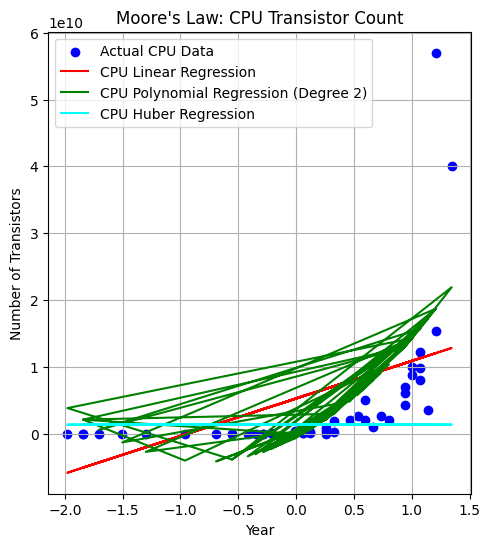

In [45]:

# --- Analysis of Errors ---
# (Include error analysis for both CPU and GPU, focusing on the differences)

# Get the absolute errors for each model
cpu_linear_errors = np.abs(cpu_linear_predictions - cpu_transistors_test)
cpu_poly_errors = np.abs(cpu_poly_predictions - cpu_transistors_test)
cpu_huber_errors = np.abs(cpu_huber_predictions - cpu_transistors_test)

# Create a DataFrame to hold the errors and predictions for CPUs
cpu_error_df = pd.DataFrame({
    'Year': cpu_years_test.flatten(),
    'Actual CPU Transistors': cpu_transistors_test,
    'CPU Linear Predicted': cpu_linear_predictions,
    'CPU Linear Error': cpu_linear_errors,
    'CPU Poly Predicted': cpu_poly_predictions,
    'CPU Poly Error': cpu_poly_errors,
    'CPU Huber Predicted': cpu_huber_predictions,
    'CPU Huber Error': cpu_huber_errors
})

# Sort the DataFrames by the largest Linear Errors
cpu_error_df_sorted = cpu_error_df.sort_values(by='CPU Linear Error', ascending=False)

# Print the 5 samples with largest errors for CPUs and GPUs
print("\n5 Samples with Largest CPU Linear Regression Errors:")
print(cpu_error_df_sorted.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the first 5 rows of the dataframes
print("\nCPU Error DF Head:")
print(cpu_error_df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Visualize the results (separate plots for CPU and GPU)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.scatter(cpu_years_test, cpu_transistors_test, color='blue', label='Actual CPU Data')
plt.plot(cpu_years_test, cpu_linear_predictions, color='red', label='CPU Linear Regression')
plt.plot(cpu_years_test, cpu_poly_predictions, color='green', label='CPU Polynomial Regression (Degree 2)')
plt.plot(cpu_years_test, cpu_huber_predictions, color='cyan', label='CPU Huber Regression')
plt.xlabel('Year')
plt.ylabel('Number of Transistors')
plt.title('Moore\'s Law: CPU Transistor Count')
plt.legend()
plt.grid(True)

In [ ]:
gpu_linear_errors = np.abs(gpu_linear_predictions - gpu_transistors_test)
gpu_poly_errors = np.abs(gpu_poly_predictions - gpu_transistors_test)
gpu_huber_errors = np.abs(gpu_huber_predictions - gpu_transistors_test)



# Create a DataFrame to hold the errors and predictions for GPUs
gpu_error_df = pd.DataFrame({
    'Year': gpu_years_test.flatten(),
    'Actual GPU Transistors': gpu_transistors_test,
    'GPU Linear Predicted': gpu_linear_predictions,
    'GPU Linear Error': gpu_linear_errors,
    'GPU Poly Predicted': gpu_poly_predictions,
    'GPU Poly Error': gpu_poly_errors,
    'GPU Huber Predicted': gpu_huber_predictions,
    'GPU Huber Error': gpu_huber_errors
})

# Sort the DataFrames by the largest Linear Errors
gpu_error_df_sorted = gpu_error_df.sort_values(by='GPU Linear Error', ascending=False)

# Print the 5 samples with largest errors for CPUs and GPUs
print("\n5 Samples with Largest CPU Linear Regression Errors:")
print(cpu_error_df_sorted.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the 5 samples with largest errors for CPUs and GPUs
print("\n5 Samples with Largest GPU Linear Regression Errors:")
print(gpu_error_df_sorted.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the first 5 rows of the dataframes
print("\nGPU Error DF Head:")
print(gpu_error_df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Visualize the results (separate plots for CPU and GPU)

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.scatter(gpu_years_test, gpu_transistors_test, color='blue', label='Actual GPU Data')
plt.plot(gpu_years_test, gpu_linear_predictions, color='red', label='GPU Linear Regression')
plt.plot(gpu_years_test, gpu_poly_predictions, color='green', label='GPU Polynomial Regression (Degree 2)')
plt.plot(gpu_years_test, gpu_huber_predictions, color='cyan', label='GPU Huber Regression')
plt.xlabel('Year')
plt.ylabel('Number of Transistors')
plt.title('Moore\'s Law: GPU Transistor Count')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
